In [134]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show

def skipper(fname):
    with open(fname) as fin:
        no_comments = (line for line in fin if not line.lstrip().startswith('#'))
        next(no_comments, None) # skip header
        for row in no_comments:
            yield row

def main(): 
    
    #train = np.loadtxt(skipper("C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/train_labels.csv"),
    #             delimiter=",", dtype=str)
    # data=[]
    # for x in train:
    #     print(x[0])
    #     print()
    #     image = imread("Datasets/train/train/"+ x[0], format =  x[0].split('.')[1])
    #     if(len(image.shape) >2):
    #         images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    #         print(image.shape[2])
    #     else:
    #         images = image.reshape((1, image.shape[0], image.shape[1], 1))

    #     images = cv2.imread("Datasets/train/train/"+ x[0], cv2.IMREAD_GRAYSCALE)
    #     images = cv2.resize(images, (180, 180))
    #     images = images.reshape((1, images.shape[0], images.shape[1], 1))
    #     #print(img_transformed, x[3])
    #     data.append([images, x[3]])

    # shuffle(data)
    # #print(data)
    # np.save('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/data.npy', data)

    #train
    train = np.loadtxt(skipper("C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/train_labels.csv"),
                       delimiter=",", dtype=str)
    #test
    test = np.loadtxt(skipper("C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test_labels.csv"),
                       delimiter=",", dtype=str, usecols=range(8) )

    
    #train
    images_data = []
    labels_data = []

    for x in train:
        image_path = "Datasets/train/train/" + x[0]
        image = imread(image_path, format=x[0].split('.')[1])

        # Resize all images to a consistent size
        images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images = cv2.resize(images, (180, 180))

        # Normalize pixel values to be between 0 and 1
        images = images / 255.0

        # Expand dimensions to make it compatible with the model
        images = np.expand_dims(images, axis=-1)

        images_data.append(images)
        labels_data.append(x[3])

    #test
    test_images_data = []
    test_labels_data = []

    for x in test:
        image_path = "Datasets/test/test/" + x[0]
        print(x[0])
        image = imread(image_path, format=x[0].split('.')[1])

        # Resize all images to a consistent size
        images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        images = cv2.resize(images, (180, 180))

        # Normalize pixel values to be between 0 and 1
        images = images / 255.0

        # Expand dimensions to make it compatible with the model
        images = np.expand_dims(images, axis=-1)

        test_images_data.append(images)
        test_labels_data.append(x[3])
    
    #train
    np.save('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/images_data.npy', images_data)
    np.save('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/labels_data.npy', labels_data)

    #test
    np.save('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test_images_data.npy', test_images_data)
    np.save('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test_labels_data.npy', test_labels_data)

main()


H710.jpg
C311.jpg
s611.jpg
H811.jpg
ace-of-diamonds-vintage-playing-card-isolated-on-white-clipping-path-included-2AYKBH0.jpg
H1012.png
king-spades-casino-card-game-P9N5YE.jpg
d213.png
32199889600_2a7a32e987_b.jpg
H211.jpg
download.jpeg
C713.png
C910.png
H812.png
600x600.jpg
images.jpeg
u-g-Q1EHR120.jpg
queen-of-hearts-vector-2848224.jpg
H911.jpg
d369gwe-02dfde2c-d6f7-4b0c-aba5-1d06d7ece799.png
d910.png
C312.png
SR-0205__75579.1516315031.png
Queen+of+Diamonds+-+Wrapped+Canvas+Graphic+Art+Print+on+Canvas.jpg
d313.jpg
jack-of-hearts-vector-258681.jpg
jack-of-clubs-ppn-prints.jpg
king-clubs-card-wood-deck-cards-laying-vintage-table-background-old-west-salon-style-47845674.jpg
Queen-of-diamonds-200x300.jpg
jack-of-hearts-playing-card-eps-vector_csp53653389.jpg
H611.png
d1011.png
H511.jpg
H1011.jpg
550x550.jpg
C211.jpg
ace-hearts-playing-card-old-paper-vintage-style_47243-16.jpg
s711.png
C712.jpg
d312.jpg
d1012.png
d811.jpg
d211.jpg
vector-illustration-of-ace-of-clubs-on-white-background-ER

In [142]:
imageData = np.load('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/images_data.npy', allow_pickle=True)
labelData= np.load('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/labels_data.npy', allow_pickle=True)

imageDataT = np.load('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test_images_data.npy', allow_pickle=True)
labelDataT= np.load('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test_labels_data.npy', allow_pickle=True)


# train_images=[]
# train_ids=[]
# for i in range(len(train)):
#     train_images.append(train[i]) 
#     train_ids.append(labelData[i])

# train_images=np.array(train_images)
# train_ids=np.array(train_ids)

# test_images=[]
# test_ids=[]
# for i in range(len(test)):
#     test_images.append(test[i]) 
#     test_ids.append(labelDataT[i])

# test_images=np.array(test_images)
# test_ids=np.array(test_ids)


labelData = labelData.astype(float)
labelDataT = labelDataT.astype(float)

train_images = []
train_ids = []
for i in range(len(train)):
    train_images.append(train[i])
    train_ids.append(labelData[i])

train_images = np.array(train_images)
train_ids = np.array(train_ids, dtype=float)  # Convert labels to floats

test_images = []
test_ids = []
for i in range(len(test)):
    test_images.append(test[i])
    test_ids.append(labelDataT[i])

test_images = np.array(test_images)
test_ids = np.array(test_ids, dtype=float)



print('success')

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=250
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])

model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)



model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_images, train_ids, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_ids), callbacks=[cp]).history



success
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)

C:\Users\nmb20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 11s 590ms/step - loss: 3.9751 - accuracy: 0.0312 - val_loss: 3.9664 - val_accuracy: 0.0102
Epoch 3/250
18/18 [==============================] - 12s 672ms/step - loss: 3.9690 - accuracy: 0.0275 - val_loss: 3.9620 - val_accuracy: 0.0204
Epoch 4/250
18/18 [==============================] - 11s 627ms/step - loss: 3.9635 - accuracy: 0.0349 - val_loss: 3.9646 - val_accuracy: 0.0102
Epoch 5/250
18/18 [==============================] - 11s 604ms/step - loss: 3.9643 - accuracy: 0.0349 - val_loss: 3.9601 - val_accuracy: 0.0204
Epoch 6/250
18/18 [==============================] - 11s 637ms/step - loss: 3.9663 - accuracy: 0.0349 - val_loss: 4.3253 - val_accuracy: 0.0204
Epoch 7/250
18/18 [==============================] - 11s 625ms/step - loss: 3.9894 - accuracy: 0.0294 - val_loss: 3.9540 - val_accuracy: 0.0204
Epoch 8/250
18/18 [==============================] - 11s 612ms/step - loss: 3.9557 - accuracy: 0.0349 - val_loss: 3.9499 - val_accuracy: 0.0204
Epoc

4/4 [==============================] - 0s 83ms/step
[8.73821250e-07 9.00305349e-06 4.59892006e-04 4.16241866e-03
 7.34835625e-01 1.42788285e-05 2.21094820e-06 9.19459490e-05
 4.52738495e-05 9.49295463e-06 4.47966065e-03 7.87124783e-03
 1.31817997e-05 2.27565382e-04 2.78731168e-04 9.50783124e-06
 6.69591827e-05 7.49429364e-06 1.97675981e-04 7.10452639e-08
 1.62717333e-05 9.19803279e-05 8.03475210e-04 4.57229617e-04
 4.76264060e-02 2.28238014e-06 4.01468016e-03 6.94921328e-05
 9.20622028e-07 2.72592413e-04 2.96002236e-05 2.15771809e-08
 4.70732687e-07 1.29136140e-04 1.01005775e-04 1.02554429e-06
 7.42226257e-04 1.89673726e-03 4.81872587e-04 1.07925590e-02
 5.90072159e-06 1.32966015e-04 3.73364310e-04 1.51294633e-03
 1.74453703e-03 1.37090613e-03 3.30111869e-02 3.71243732e-05
 8.06320831e-02 1.35555035e-06 4.77673495e-07 6.08612187e-02
 2.84683028e-06]
0.7348356 4
Seven of Spades


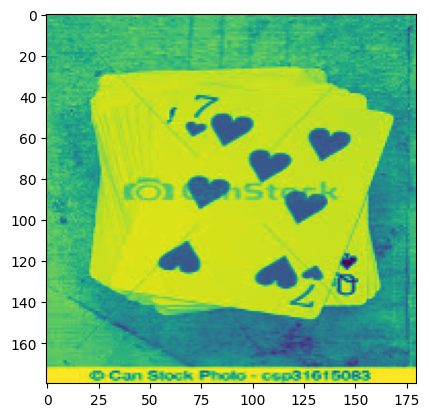

0.95220405 40
Five of Clubs


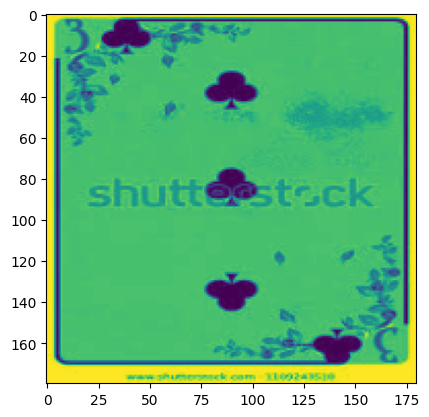

0.8966695 24
Ten of Diamonds


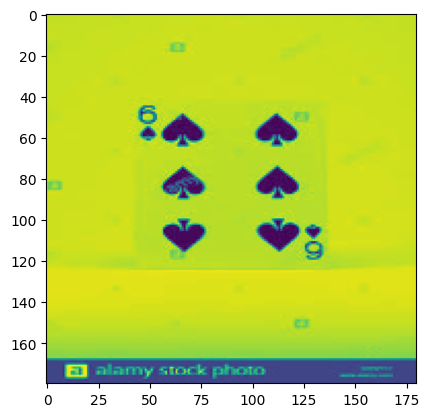

0.5825968 1
Ace of Hearts


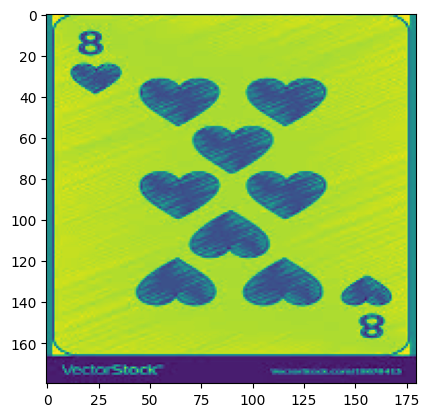

0.4298638 42
Three of Clubs


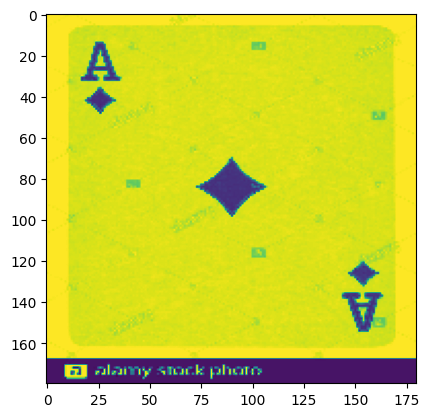

0.9994209 25
Nine of Clubs


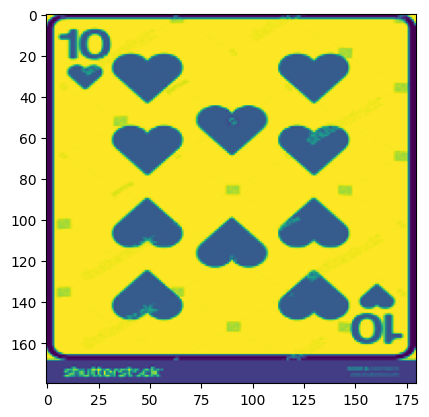

0.58762157 41
Jack of Spades


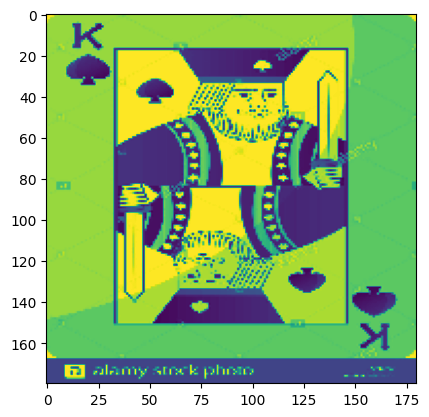

0.6949228 52
Six of Clubs


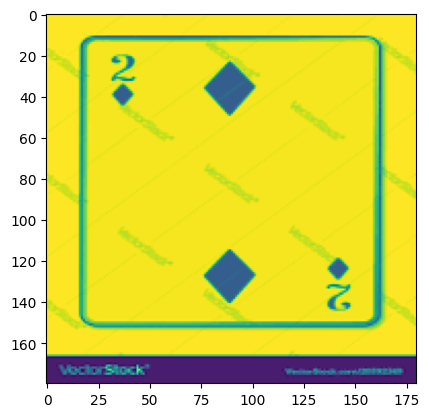

0.15741117 41
Jack of Spades


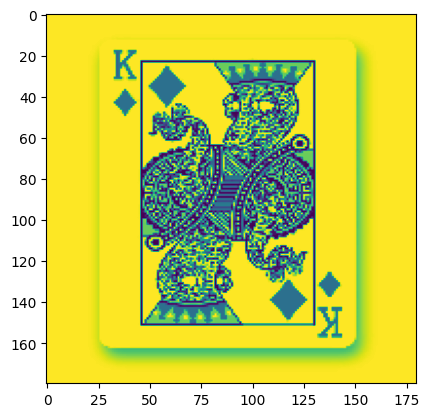

0.9717613 13
Four of Spades


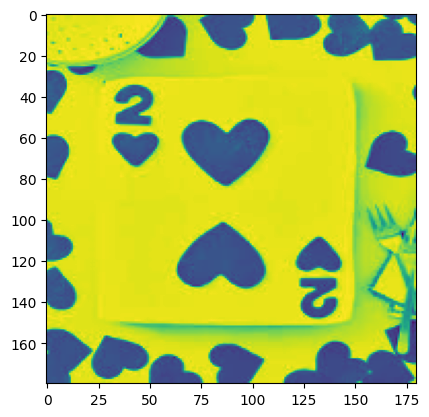

0.16694489 46
Ace of Clubs


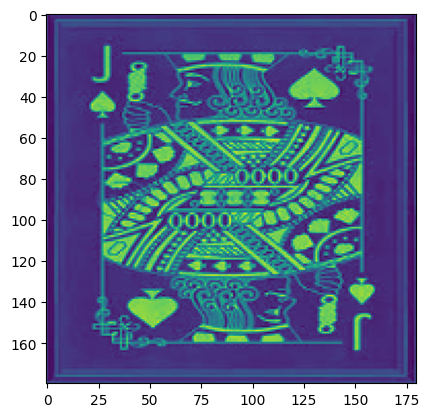

0.45513216 17
Four of Clubs


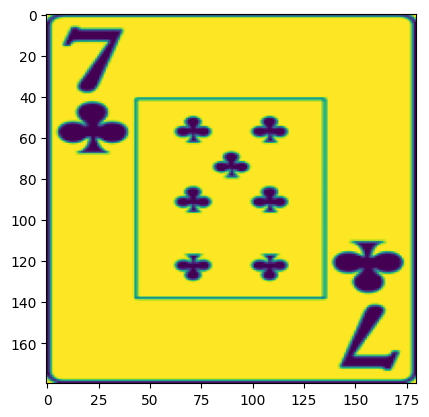

0.8016281 35
Eight of Clubs


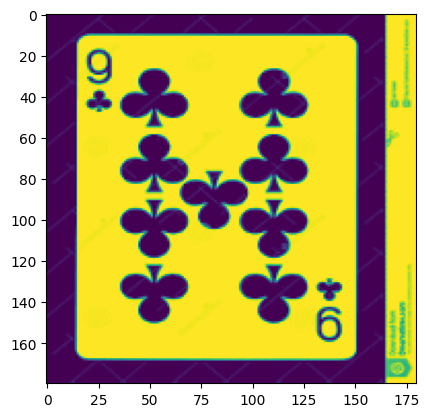

0.81992286 33
Two of Diamonds


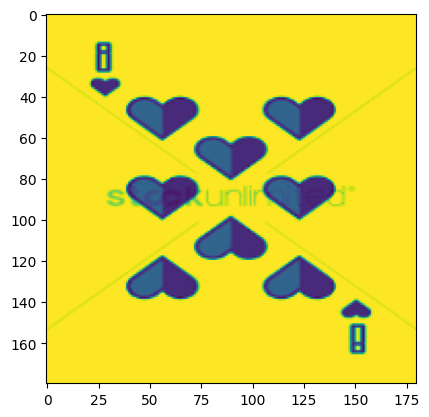

0.2030703 51
Eight of Diamonds


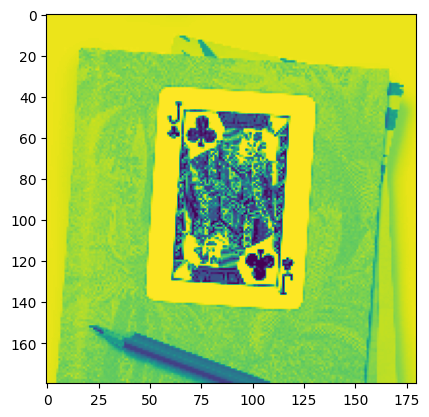

0.3828409 22
Two of Hearts


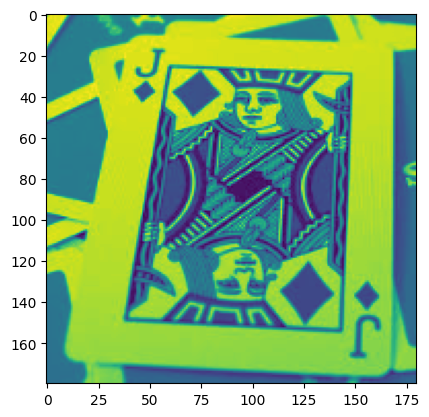

In [163]:
# arr = np.array(['C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test/test/600x600.jpg'])
# predictions=model.predict(arr)
card_map = {
    1: "Ace of Hearts",
    2: "Three of Diamonds",
    3: "Jack of Hearts",
    4: "Seven of Spades",
    5: "Seven of Clubs",
    6: "Queen of Spades",
    7: "Three of Hearts",
    8: "Queen of Clubs",
    9: "King of Diamonds",
    10: "Ace of Spades",
    11: "Ten of Hearts",
    12: "Three of Spades",
    13: "Four of Spades",
    14: "Six of Spades",
    15: "Seven of Hearts",
    16: "Five of Spades",
    17: "Four of Clubs",
    18: "Nine of Spades",
    19: "Ten of Clubs",
    20: "Six of Diamonds",
    21: "Nine of Diamonds",
    22: "Two of Hearts",
    23: "Jack of Clubs",
    24: "Ten of Diamonds",
    25: "Nine of Clubs",
    26: "Nine of Hearts",
    27: "Ace of Diamonds",
    28: "Two of Clubs",
    29: "Five of Diamonds",
    30: "King of Clubs",
    31: "Queen of Diamonds",
    32: "Eight of Hearts",
    33: "Two of Diamonds",
    34: "Six of Hearts",
    35: "Eight of Clubs",
    36: "Eight of Spades",
    37: "Four of Hearts",
    38: "King of Hearts",
    39: "Two of Spades",
    40: "Five of Clubs",
    41: "Jack of Spades",
    42: "Three of Clubs",
    43: "Ten of Spades",
    44: "Five of Hearts",
    45: "Jack of Diamonds",
    46: "Ace of Clubs",
    47: "Seven of Diamonds",
    48: "Queen of Hearts",
    49: "King of Spades",
    50: "Four of Diamonds",
    51: "Eight of Diamonds",
    52: "Six of Clubs"
}

predictions=model.predict(test_images)
sample=test_images[:16]

print(predictions[0])


for t, s in enumerate(predictions[:16]):
    
    biggest = 0
    biggestIndex = -1
    for i in range(53):
        if s[i] > biggest:
            biggest = s[i]
            biggestIndex = i

    print(biggest,biggestIndex)
    print(card_map[biggestIndex])
    imshow(test_images[0])
    imshow(sample[t].reshape(sample.shape[1], sample.shape[2]))
    show()

# plt.figure(figsize=(16,16))
# for i in range(16):
#     plt.subplot(4,4,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
#     #plt.xlabel(labels[predictions[i]])
# plt.show()




In [151]:
print(train[2]

[[[0.99607843]
  [0.99607843]
  [0.99607843]
  ...
  [0.99607843]
  [0.99607843]
  [0.99607843]]

 [[0.99607843]
  [0.99607843]
  [0.99607843]
  ...
  [0.99607843]
  [0.99607843]
  [0.99607843]]

 [[0.99607843]
  [0.99607843]
  [0.99607843]
  ...
  [0.99607843]
  [0.99607843]
  [0.99607843]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]
